In [16]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [17]:
N = 2
M = 5
V = -1
dt = 0.01

In [18]:
# example simulation 
total_time = 5

total_steps = int(total_time / dt)
times = np.linspace(0, total_time, total_steps)
mu_V_ratio_routine = np.linspace(10, 0, total_steps)
J_V_ratio_routine = np.linspace(0.1, 2, total_steps)

adiabatic_energies, adiabatic_wavefunctions, adiabatic_probabilities, adiabatic_overlaps, true_energies = \
    simulate_adiabatic_evolution(N, M, V, mu_V_ratio_routine, J_V_ratio_routine, times, dt=dt, initial_state=None)

(0.0, 20.0)

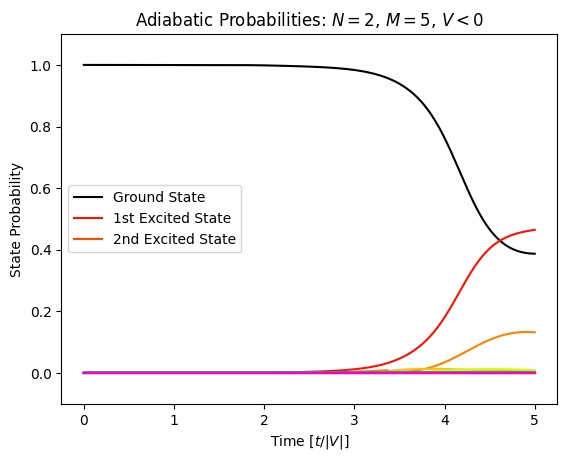

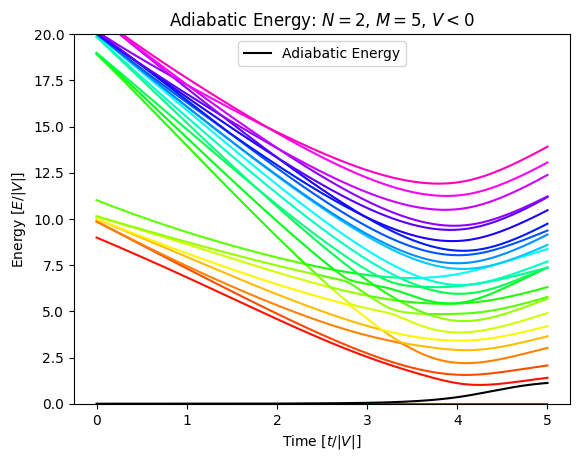

In [25]:
# example plotting
colors = get_cmap("gist_rainbow", M**N)

fig, ax = plt.subplots()
for index in range(M**N):
    if index == 0:
        ax.plot(times, adiabatic_probabilities[:,index], color = "k", label = "Ground State")
    elif index == 1:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "1st Excited State")
    elif index == 2:
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index), label = "2nd Excited State") 
    else: 
        ax.plot(times, adiabatic_probabilities[:,index], color = colors(index))
ax.set_ylim(-0.1,1.1)
ax.legend(loc = "center left")
ax.set_title(f"Adiabatic Probabilities: $N={N}$, $M={M}$, $V<0$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("State Probability")

fig, ax = plt.subplots()
for index in range(M**N):
    if index == 0:
        ax.plot(times, true_energies[:,index]-true_energies[:,0], color = colors(index))
    else:
        ax.plot(times, true_energies[:,index]-true_energies[:,0], color = colors(index))
ax.plot(times, adiabatic_energies-true_energies[:,0], color = "k", label = "Adiabatic Energy")
ax.legend(loc = "upper center")
ax.set_title(f"Adiabatic Energy: $N={N}$, $M={M}$, $V<0$")
ax.set_xlabel("Time [$t/|V|$]")
ax.set_ylabel("Energy [$E/|V|$]")

ax.set_ylim(0,20)

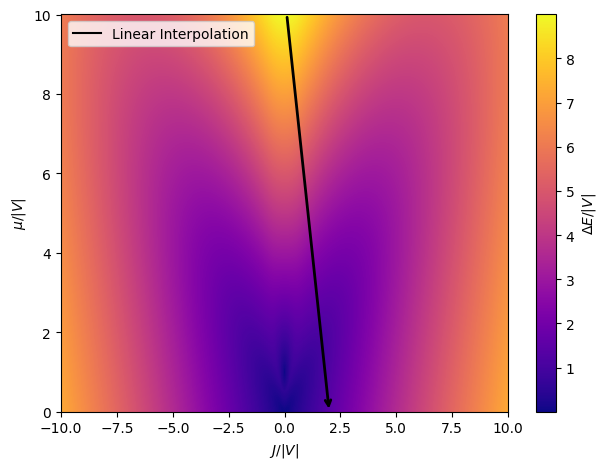

In [20]:
df = pd.read_csv("energy_gap_over_V_neg_V_resolution=1000.csv", index_col='J/V_ratios')
energy_gap_grid = df.to_numpy()

J_V_ratios = np.linspace(-10,10,1000)
mu_V_ratios = np.linspace(0,10,1000)
mu_V_ratio_grid, J_V_ratio_grid = np.meshgrid(mu_V_ratios, J_V_ratios)

plt.pcolormesh(J_V_ratio_grid, mu_V_ratio_grid, energy_gap_grid, shading = "auto", cmap = "plasma")
plt.colorbar(label="$\Delta E/ |V|$")

start = (J_V_ratio_routine[0], mu_V_ratio_routine[0])  # starting point of arrow
end = (J_V_ratio_routine[-1], mu_V_ratio_routine[-1])  # ending point of arrow
plt.plot(J_V_ratio_routine[0], mu_V_ratio_routine[0], "-k", label = "Linear Interpolation")
plt.annotate('', xy=end, xytext=start, arrowprops=dict(arrowstyle='->', color='k', lw = 2))

plt.xlabel("$J/|V|$")
plt.ylabel("$\mu/|V|$")
plt.legend(loc="upper left")
plt.tight_layout()


2
